<a href="https://colab.research.google.com/github/torchroh/Deep-learning/blob/main/D2L_2_3_Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3 Linear Algebra

In [1]:
import torch

# 2.3.1 Scalars




---
constant scalars는 실제 숫자들을 나타냄.
unknown scalars는 미지수를 나타냄. (보통 소문자로 표시함.)





In [16]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

# 2.3.2 Vectors




---
vector's element로 scalar를 쓰기도 한다. 벡터를 시각화 할 때는 수직으로 쌓아서 시각화함.

indexing 가능, 길이 len(x)

vector와 같이 axis가 하나면 shape에 element가 하나 나옴.


In [23]:
x = torch.arange(3, dtype = torch.float32)
print(x)
print(x[1])
print(x[2])
print(len(x))
print(x.shape)

tensor([0., 1., 2.])
tensor(1.)
tensor(2.)
3
torch.Size([3])


# 2.3.3 Matrices




---

scalar --> 0th-order tensor
vector --> 1st-order tensor
matix --> 2nd-order tensor

A.T는 transpose를 나타냄.

matrix A는 m * n, A.T는 n * m

In [2]:
A = torch.arange(6).reshape(3,2)
A, A.T

(tensor([[0, 1],
         [2, 3],
         [4, 5]]),
 tensor([[0, 2, 4],
         [1, 3, 5]]))

In [3]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

# 2.3.4 Tensors




---

scalar, vector, matrix는 각각 0차, 1차, 2차 tensor임.

고차 tensor를 작업해야할 수도 있다.

tensor는 주로 대문자로 표현됨.

In [4]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

# 2.3.5 Basic Properties of Tensor Arithmetic




---

scalar, vector, matirx, nth-tensor는 요소별로 더하거나 곱할 수 있다.


In [5]:
A = torch.arange(6, dtype=torch.float32).reshape(2,3)
B = A.clone()
A, A + B, A * B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]),
 tensor([[ 0.,  1.,  4.],
         [ 9., 16., 25.]]))

scalar와 tensor를 더하거나 곱하면, tensor 모양과 같은 결과가 나옴.



In [6]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))



```

# 2.3.6 Reduction




---



In [11]:
A, A.shape, A.sum(), A.sum(axis=0)

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 torch.Size([2, 3]),
 tensor(15.),
 tensor([3., 5., 7.]))

sum 함수를 호출하면 모든 axis가 reduce되어 scalar가 생성된다.

reduce 되어야할 축을 지정할 수도 있다. 해당 축을 따라 축소되어 출력 벡터를 생성한다.

A.sum(axis=[0, 1]) == A.sum()

In [8]:
A.shape, A.sum(axis=0).shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([3]), torch.Size([2]))

mean(average)도 행렬 전체를 대상으로 할 수도 있고, 축을 지정하여 표현할 수도 있다.

In [9]:
A.mean(), A.sum()/A.numel()

(tensor(2.5000), tensor(2.5000))

mean도 특정 축에 따라 조정할 수도 있음
A.shape[0] == 2 (열)

In [10]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

#2.3.7 Non-Reduction Sum



---
sum_A를 써서 각 행을 합산하되 축을 유지한 행렬을 생성할 수 있다.

In [12]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [13]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

축마다 누적 합을 계산할 수도 있음

원래 A 상태 [[0., 1., 2.],[3., 4., 5.]]

In [14]:
A.cumsum(axis=0), A.cumsum(axis=1)

(tensor([[0., 1., 2.],
         [3., 5., 7.]]),
 tensor([[ 0.,  1.,  3.],
         [ 3.,  7., 12.]]))

# 2.3.8~10 Dot, Matrix-Vector, Matrix-Matrix Products



---
본격적 행렬 다루기.

dot product = 내적

(같은 위치에 있는 요소의 곱의 합)


In [25]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

matrix-vector product (mv) 진행할 수 있다.

matrix의 column dimension == vector의 dimension 여야 함.

matrix-matrix 할 때는 (mm) 쓰기

@는 matix-vector와 matrix-matrix 둘 다 쓴다.

In [26]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [27]:
B = torch.ones(3,4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

# 2.3.11 Norms


---

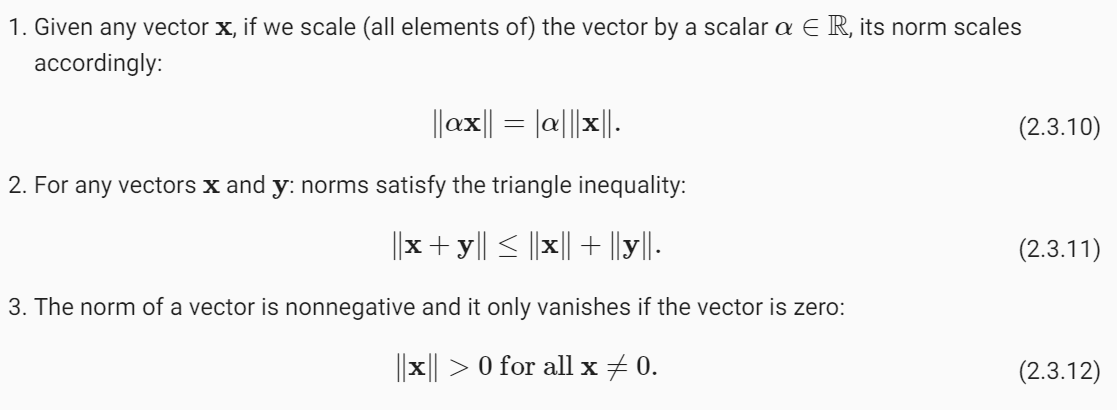

l2 norm (Euclidean norm)

the square root of the sum of squared of a vector's element

피타고라스처럼 빗변을 구함.

In [28]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

l1 norm (Manhattan distance)

벡터 요소의 절댓값 합

In [29]:
torch.abs(u).sum()

tensor(7.)

lp norm (general norm)

l2와 l1은 lp의 특수한 경우

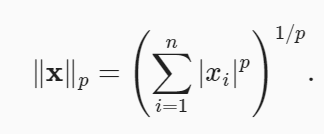

Frobenius norm

행렬 element 제곱 합의 제곱근

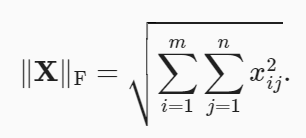

# 2.3.13 연습문제


---
이어서...
